In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv('day.csv')

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


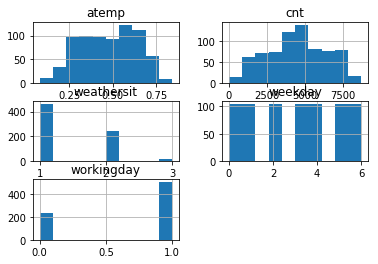

In [17]:
dataframe = data[['dteday', 'weekday', 'workingday', 'weathersit', 'atemp', 'cnt']]
dataframe.head(10)
dataframe.hist()
plt.show()

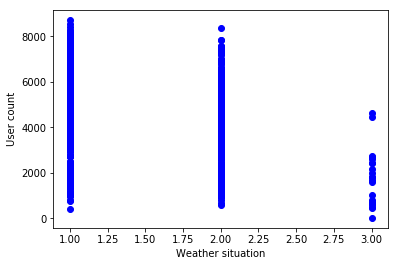

In [13]:
plt.scatter(dataframe.weathersit, dataframe.cnt, color='blue')
plt.xlabel("Weather situation")
plt.ylabel("User count")
plt.show()

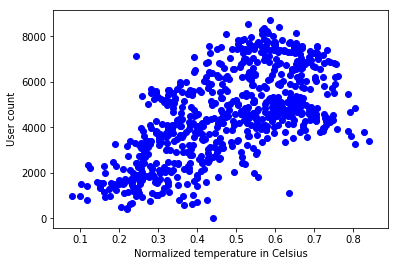

In [18]:
plt.scatter(dataframe.atemp, dataframe.cnt, color='blue')
plt.xlabel("Normalized temperature in Celsius")
plt.ylabel("User count")
plt.show()

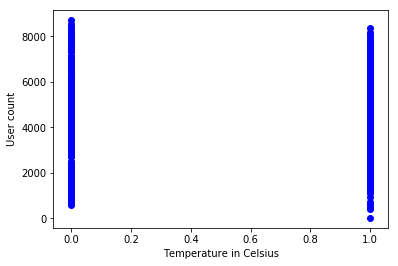

In [19]:
plt.scatter(dataframe.workingday, dataframe.cnt, color='blue')
plt.xlabel("Temperature in Celsius")
plt.ylabel("User count")
plt.show()

In [20]:
# len(data) returns the row count
# np.random.rand() returns an array of n-dimensions, here n is 1
# np.random.rand(len(data)) is an array of size len(data) with randomly and uniformly distributed float values in range [0, 1]. 
# The < 0.8 applies the comparison element-wise and stores the result in place. Thus values < 0.8 become True and value >= 0.8 become False
# dataframe[mask] here populates all the columns in dataframe with the rows generated from np.random.rand(len(data))

mask = np.random.rand(len(data)) <0.8  #split the data into train and test sets
train = dataframe[mask]
test = dataframe[~mask]

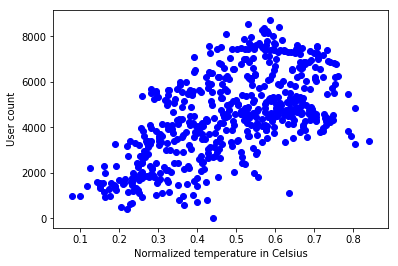

In [21]:
plt.scatter(train.atemp, train.cnt, color='blue')
plt.xlabel("Normalized temperature in Celsius")
plt.ylabel("User count")
plt.show()

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['atemp']])
train_y = np.asanyarray(train[['cnt']])

# train_x is the training data, train_y is the target values
regr.fit(train_x, train_y)

print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[7052.52674657]]
Intercept:  [1096.51631428]


Text(0, 0.5, 'User count')

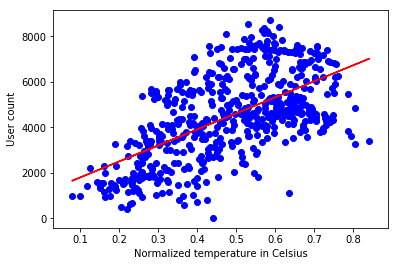

In [23]:
plt.scatter(train.atemp, train.cnt, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Normalized temperature in Celsius")
plt.ylabel("User count")

In [24]:
from sklearn.metrics import r2_score

# asanyarray converts the test samples into an array
test_x = np.asanyarray(test[['atemp']])
test_y = np.asanyarray(test[['cnt']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f " % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f " % np.mean((test_y_hat - test_y) **2 ))

# test_y_hat is the test sample, test_y is the true value
print("R2-score: %.2f " % r2_score(test_y_hat, test_y))

Mean absolute error: 1270.54 
Residual sum of squares (MSE): 2325543.39 
R2-score: -0.76 
